<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220624.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor 
* customer analysis

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as gg 
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler 
from sklearn.decomposition import PCA 
from sklearn.impute import KNNImputer 
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, mean_squared_error
import sklearn.datasets as skd

# Regressor

In [8]:
raw = skd.load_wine()
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']

In [9]:
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [21]:
scaler = StandardScaler()
x_std = scaler.fit_transform(x)
x_std = pd.DataFrame(x_std, columns = x.columns)
x_std.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [22]:
km_score = [KMeans(n_clusters = a).fit(x_std).inertia_ for a in range(1, 7)]

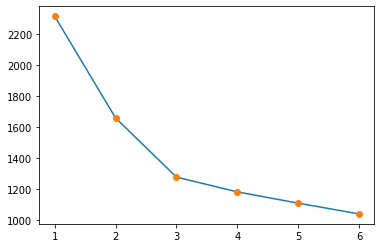

In [23]:
plt.plot(range(1,7), km_score)
plt.plot(range(1,7), km_score, 'o')

In [24]:
fit_km = KMeans(n_clusters = 3).fit(x_std)

In [34]:
wow_label = pd.DataFrame(fit_km.labels_).replace({1:0, 2:1, 0:2})

In [35]:
accuracy_score(y, wow_label)

0.9662921348314607

In [51]:
pca = PCA(n_components = 8)
fit_pca = pca.fit_transform(x_std)

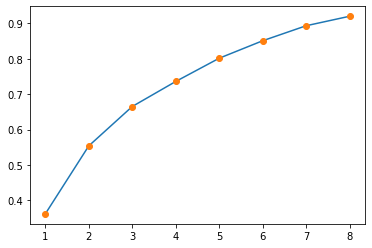

In [38]:
plt.plot(range(1, 9), pca.explained_variance_ratio_.cumsum())
plt.plot(range(1, 9), pca.explained_variance_ratio_.cumsum(), 'o')

In [45]:
wow_label.values.shape

(178, 1)

In [52]:
fit_pca = pd.DataFrame(np.c_[fit_pca, y.reshape(-1,1), wow_label.values], columns = [f'pc{a}' for a in range(1, 9)] + ['y', 'cl'])
fit_pca = fit_pca.assign(y = fit_pca['y'].astype(str),
                         cl = fit_pca['cl'].astype(str))

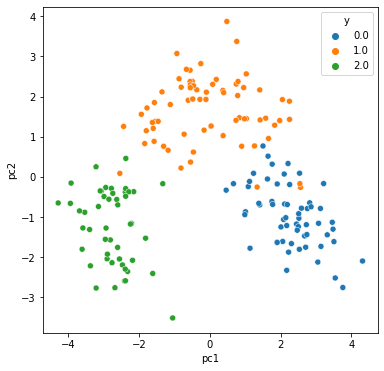

In [53]:
plt.figure(figsize = [6,6])
sns.scatterplot(data = fit_pca, x = 'pc1', y = 'pc2', hue = 'y')

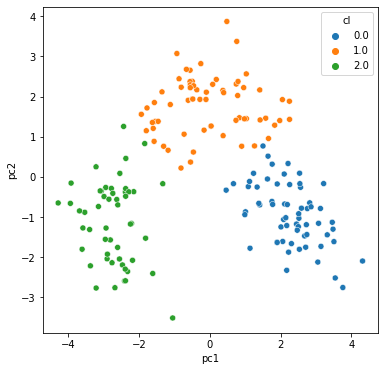

In [54]:
plt.figure(figsize = [6,6])
sns.scatterplot(data = fit_pca, x = 'pc1', y = 'pc2', hue = 'cl')

# Customer Analysis

In [56]:
os.listdir()

['.config',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'online_retail_II.xlsx',
 'ecommerce-data.csv',
 'items.csv',
 '.Rhistory',
 'shops.csv',
 'rfm_test.csv',
 'sales_train.csv',
 'item_categories.csv',
 'retail_data_response.csv',
 'retail_data_transactions.csv',
 '.ipynb_checkpoints',
 'test.csv',
 'sample_submission.csv',
 'sample_data']

In [59]:
df = pd.read_csv('ecommerce-data.csv', encoding = 'unicode_escape')

In [60]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [61]:
df.columns = [a.lower() for a in df.columns]
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [65]:
df = df[(df['country'] == 'United Kingdom') & (~df['invoiceno'].astype(str).str.contains('C'))]
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [66]:
df['date'] = pd.to_datetime(df['invoicedate'])
df['month'] = df['date'].to_numpy().astype('datetime64[M]')
df['rev'] = df['unitprice'] * df['quantity']

In [67]:
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,date,month,rev
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,20.34


In [68]:
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country', 'date', 'month', 'rev'],
      dtype='object')

In [69]:
df = df[['customerid', 'date', 'month', 'rev']]
df.head()

,customerid,date,month,rev
0,17850.0,2010-12-01 08:26:00,2010-12-01,15.30
1,17850.0,2010-12-01 08:26:00,2010-12-01,20.34
2,17850.0,2010-12-01 08:26:00,2010-12-01,22.00
3,17850.0,2010-12-01 08:26:00,2010-12-01,20.34
4,17850.0,2010-12-01 08:26:00,2010-12-01,20.34


In [71]:
df = df.rename(columns = {'customerid' : 'id'})
df.head()

,id,date,month,rev
0,17850.0,2010-12-01 08:26:00,2010-12-01,15.30
1,17850.0,2010-12-01 08:26:00,2010-12-01,20.34
2,17850.0,2010-12-01 08:26:00,2010-12-01,22.00
3,17850.0,2010-12-01 08:26:00,2010-12-01,20.34
4,17850.0,2010-12-01 08:26:00,2010-12-01,20.34


In [73]:
df = df.groupby(['id', 'date', 'month'])['rev'].sum().reset_index()
df.head()

,id,date,month,rev
0,12346.0,2011-01-18 10:01:00,2011-01-01,77183.60
1,12747.0,2010-12-05 15:38:00,2010-12-01,358.56
2,12747.0,2010-12-13 10:41:00,2010-12-01,347.71
3,12747.0,2011-01-20 14:01:00,2011-01-01,303.04
4,12747.0,2011-03-01 14:53:00,2011-03-01,310.78


In [74]:
df = df.sort_values(['id', 'date'], ascending = [1, 0])
df.head()

,id,date,month,rev
0,12346.0,2011-01-18 10:01:00,2011-01-01,77183.60
11,12747.0,2011-12-07 14:34:00,2011-12-01,438.50
10,12747.0,2011-11-17 17:13:00,2011-11-01,312.73
9,12747.0,2011-10-04 08:26:00,2011-10-01,675.38
8,12747.0,2011-08-22 10:38:00,2011-08-01,301.70


In [82]:
info_m = df.groupby(['id', 'month'])['rev'].sum().reset_index().rename(columns = {'rev':'money'})
info_m = pd.pivot_table(info_m, index = 'id', columns = 'month', values = 'money').reset_index()
info_m = pd.melt(info_m, id_vars = 'id', var_name = 'month', value_name = 'money').sort_values(['id', 'month'], ascending = [1,0])
info_m = info_m.groupby('id').head(3)
info_m = info_m.groupby(['id'])['money'].sum().reset_index()
info_m.head()


,id,money
0,12346.0,0.00
1,12747.0,1426.61
2,12748.0,14002.34
3,12749.0,1335.65
4,12820.0,554.11


In [83]:
info_f = df.groupby(['id', 'month'])['rev'].count().reset_index().rename(columns = {'rev':'freq'})
info_f = pd.pivot_table(info_f, index = 'id', columns = 'month', values = 'freq').reset_index()
info_f = pd.melt(info_f, id_vars = 'id', var_name = 'month', value_name = 'freq').sort_values(['id', 'month'], ascending = [1,0])
info_f = info_f.groupby('id').head(3)
info_f = info_f.groupby(['id'])['freq'].sum().reset_index()
info_f.head()


,id,freq
0,12346.0,0.0
1,12747.0,3.0
2,12748.0,70.0
3,12749.0,2.0
4,12820.0,2.0


In [84]:
df['date'].max()

Timestamp('2011-12-09 12:49:00')

In [85]:
date_now = datetime(2011,12,31)

In [88]:
info_r = df.groupby(['id']).agg({'date' : lambda x : (date_now - x.max()).days}).rename(columns = {'date':'recency'}).reset_index()
info_r.head()

,id,recency
0,12346.0,346
1,12747.0,23
2,12748.0,21
3,12749.0,24
4,12820.0,24


In [90]:
info = pd.merge(pd.merge(info_r, info_f, 'left', 'id'), info_m, 'left', 'id')
info.head()

,id,recency,freq,money
0,12346.0,346,0.0,0.00
1,12747.0,23,3.0,1426.61
2,12748.0,21,70.0,14002.34
3,12749.0,24,2.0,1335.65
4,12820.0,24,2.0,554.11


In [92]:
info = info.assign(r = pd.qcut(info['recency'], 5, list('12345')),
            f = pd.qcut(info['freq'].rank(method = 'first'), 5, list('54321')),
            m = pd.qcut(info['money'].rank(method = 'first'), 5, list('54321'))
            )
info.head()

,id,recency,freq,money,r,f,m
0,12346.0,346,0.0,0.00,5,5,5
1,12747.0,23,3.0,1426.61,1,1,1
2,12748.0,21,70.0,14002.34,1,1,1
3,12749.0,24,2.0,1335.65,1,2,1
4,12820.0,24,2.0,554.11,1,2,2


In [94]:
info = info.assign(rf = info['r'].astype(str) + info['f'].astype(str))
info.head()

,id,recency,freq,money,r,f,m,rf
0,12346.0,346,0.0,0.00,5,5,5,55
1,12747.0,23,3.0,1426.61,1,1,1,11
2,12748.0,21,70.0,14002.34,1,1,1,11
3,12749.0,24,2.0,1335.65,1,2,1,12
4,12820.0,24,2.0,554.11,1,2,2,12


In [95]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [96]:
info.assign(rf = info['rf'].replace(seg_map, regex = True))

,id,recency,freq,money,r,f,m,rf
0,12346.0,346,0.0,0.00,5,5,5,champions
1,12747.0,23,3.0,1426.61,1,1,1,hibernating
2,12748.0,21,70.0,14002.34,1,1,1,hibernating
3,12749.0,24,2.0,1335.65,1,2,1,hibernating
4,12820.0,24,2.0,554.11,1,2,2,hibernating
...,...,...,...,...,...,...,...,...
3916,18280.0,298,0.0,0.00,5,3,3,potential_loyalists
3917,18281.0,201,0.0,0.00,5,3,3,potential_loyalists
3918,18282.0,28,1.0,77.84,1,2,3,hibernating
3919,18283.0,24,6.0,974.21,1,1,1,hibernating
